####Comp3162 Lab
####Trishanna Ford - 620147893

In [344]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#####Data Exploration

In [345]:
dftrain = pd.read_csv('train.csv')

In [346]:
dftrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,PatientId
0,62,M,ATA,131,0,0,Normal,130,N,0.1,Up,0,474
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1,370
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,Up,0,205
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,Up,0,544
4,53,M,ASY,125,0,1,Normal,120,N,1.5,Up,1,302


In [347]:
dftrain['HeartDisease'].value_counts()

1    389
0    299
Name: HeartDisease, dtype: int64

In [348]:
dftrain.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,PatientId
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,53.380814,132.904070,200.460756,0.238372,136.594477,0.901017,0.565407,451.779070
std,9.400690,18.025038,110.493566,0.426398,25.679580,1.061356,0.496064,260.959924
min,28.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,119.000000,0.000000,0.000000,230.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,446.500000
75%,60.000000,140.000000,267.250000,0.000000,155.000000,1.500000,1.000000,681.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,4.400000,1.000000,916.000000


<ipython-input-349-9eb963040f4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dftrain.corr(), annot=True, cmap='coolwarm', fmt=".2f")


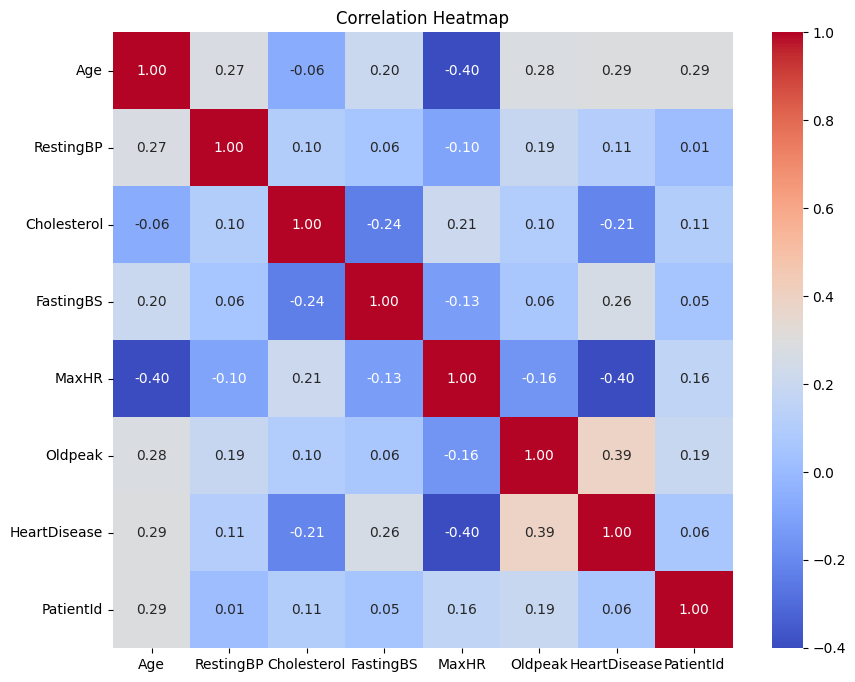

In [349]:
plt.figure(figsize=(10, 8))
sns.heatmap(dftrain.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

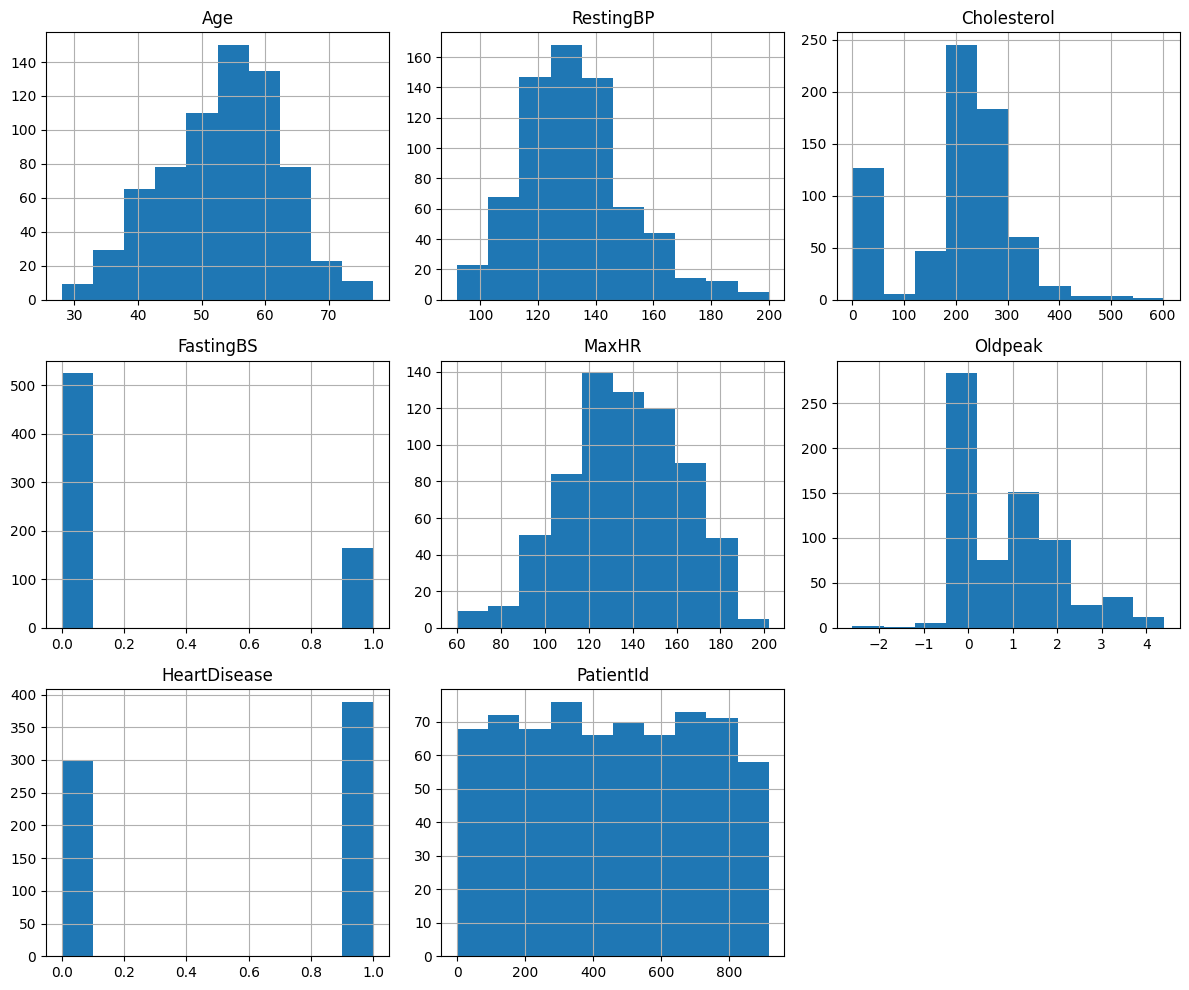

In [350]:
dftrain.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

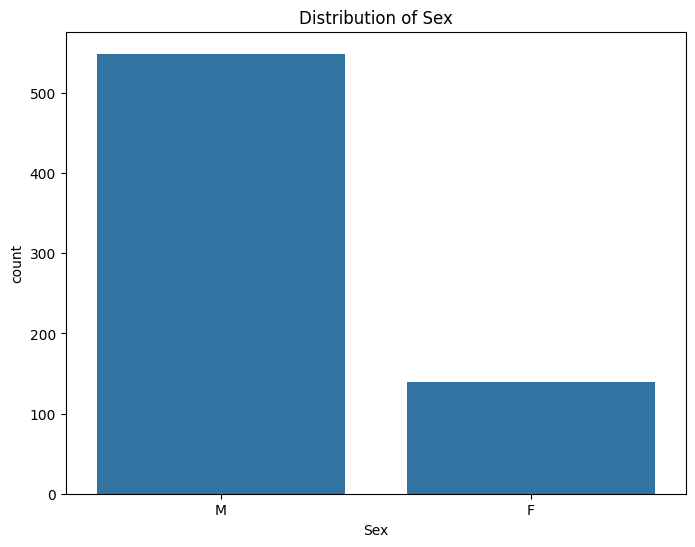

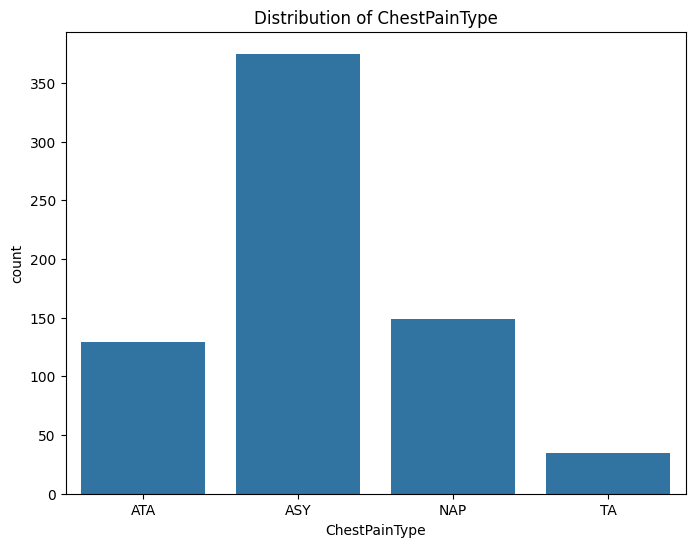

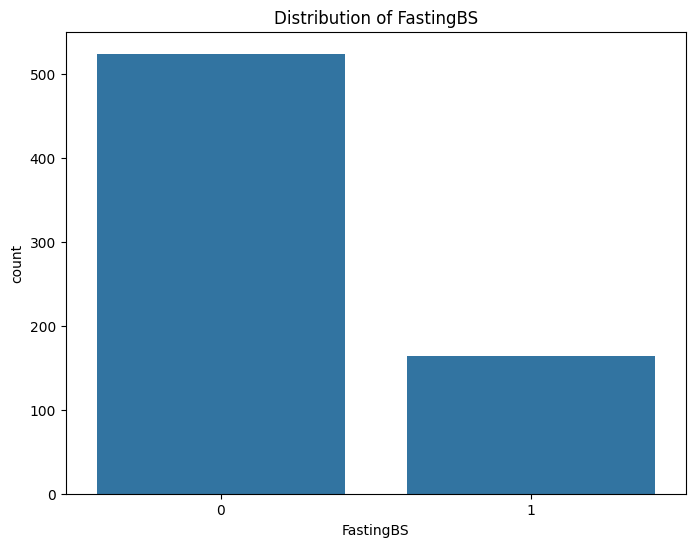

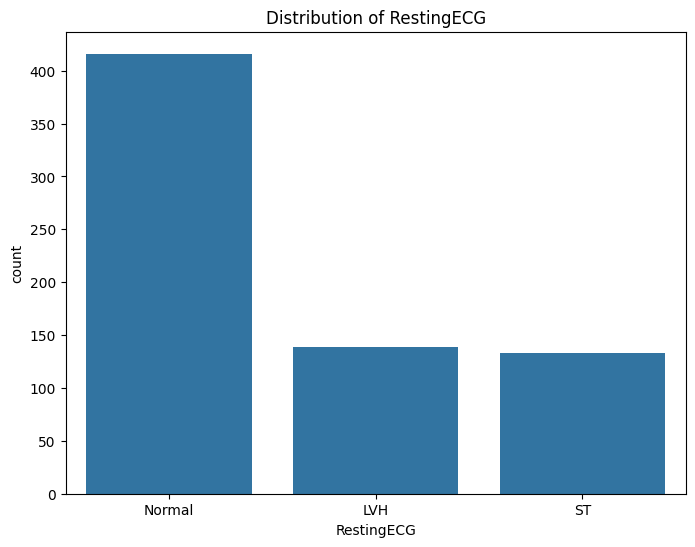

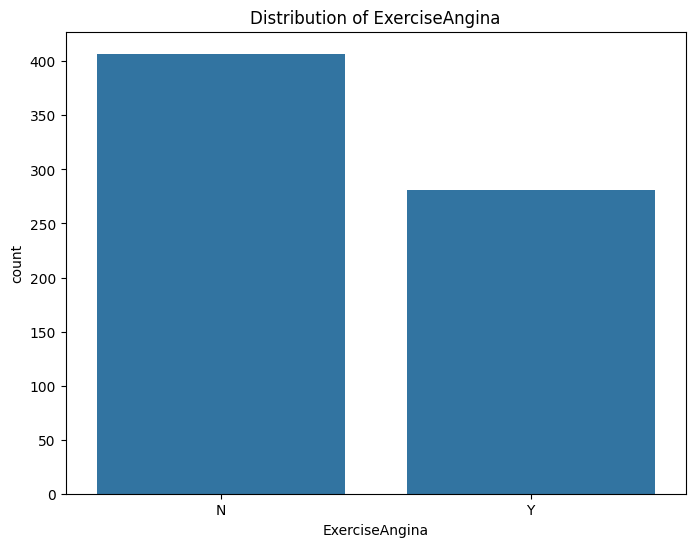

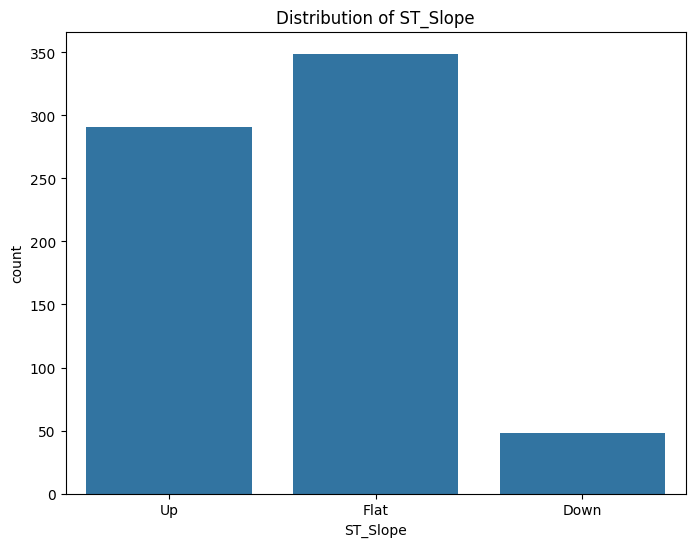

In [351]:
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dftrain, x=var)
    plt.title(f'Distribution of {var}')
    plt.show()

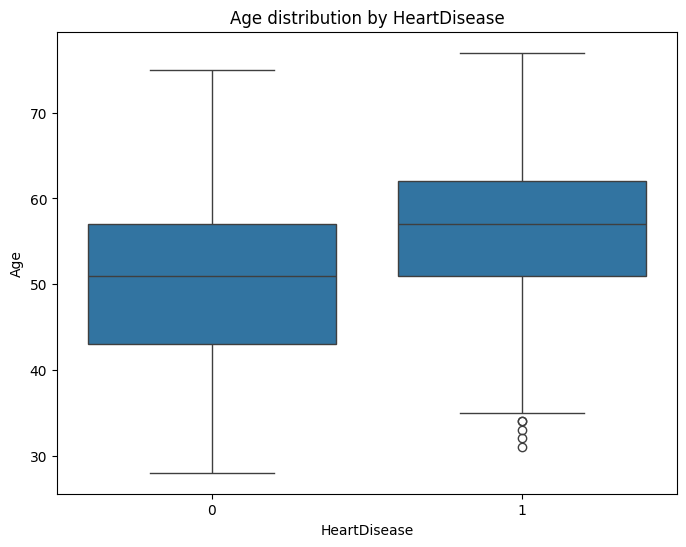

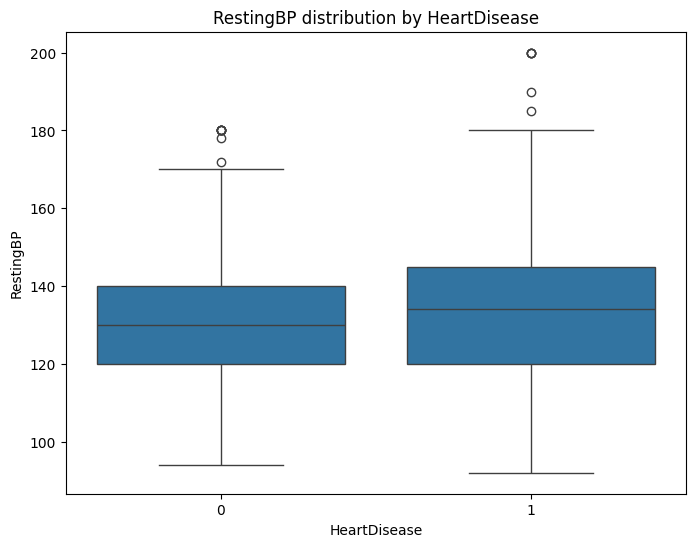

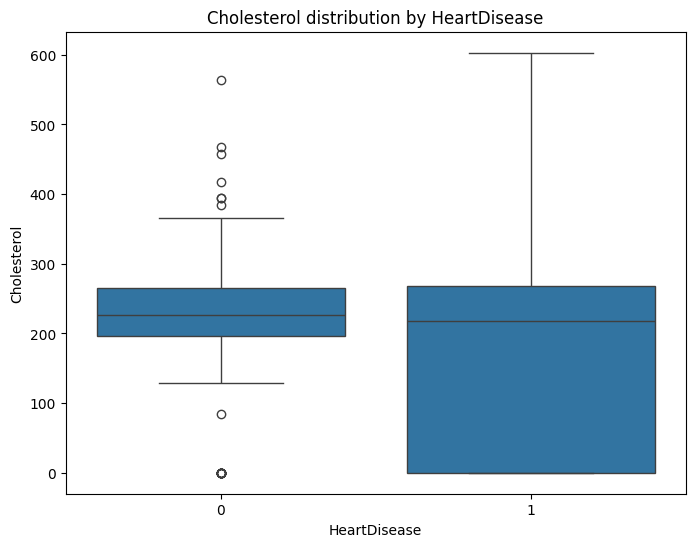

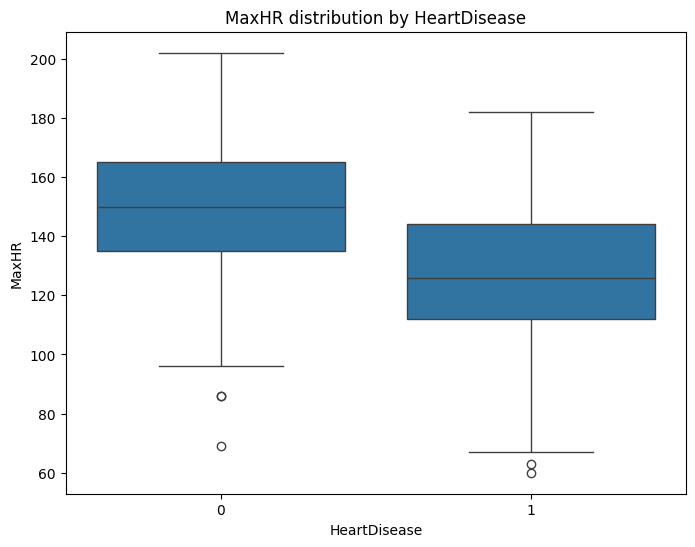

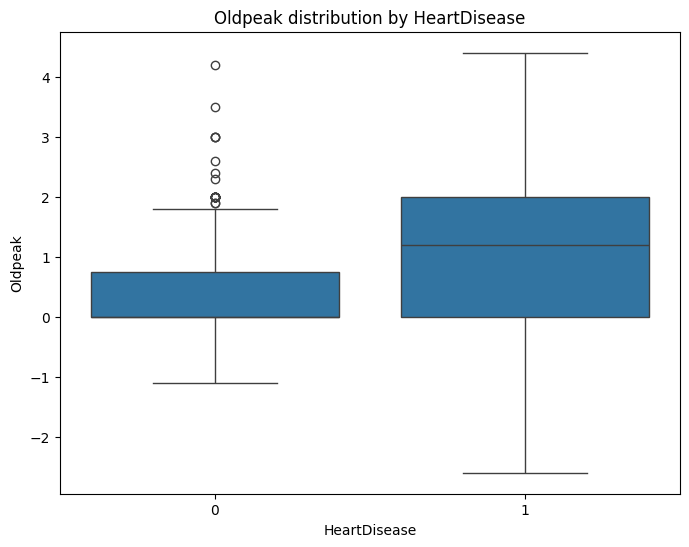

In [352]:
numerical_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dftrain, x='HeartDisease', y=var)
    plt.title(f'{var} distribution by HeartDisease')
    plt.show()

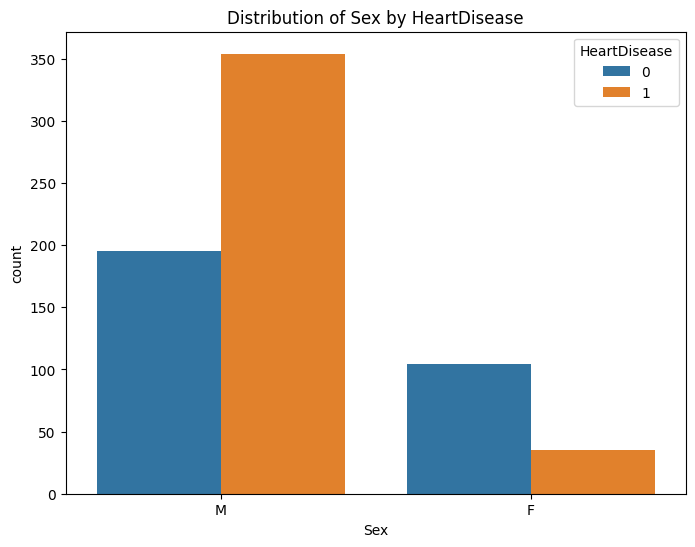

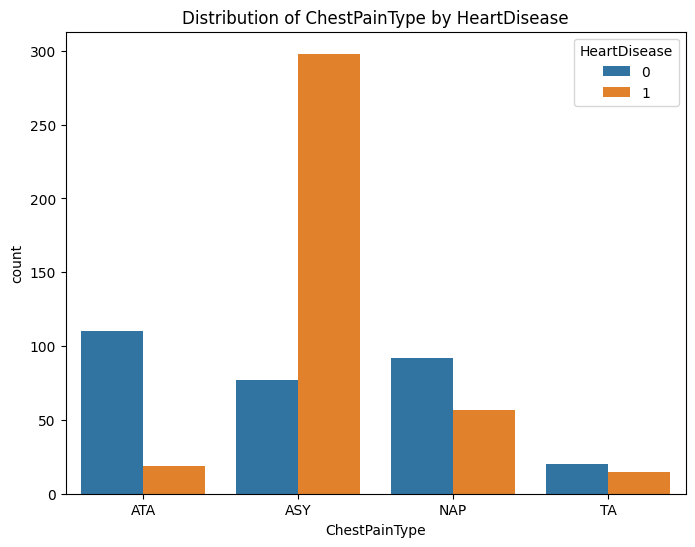

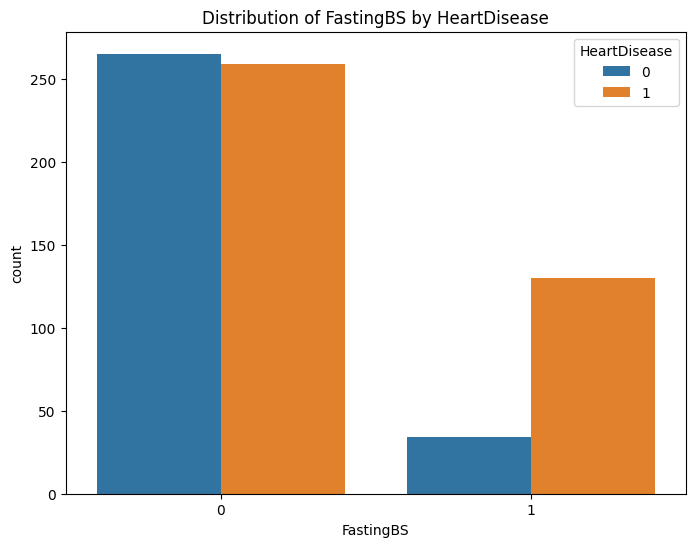

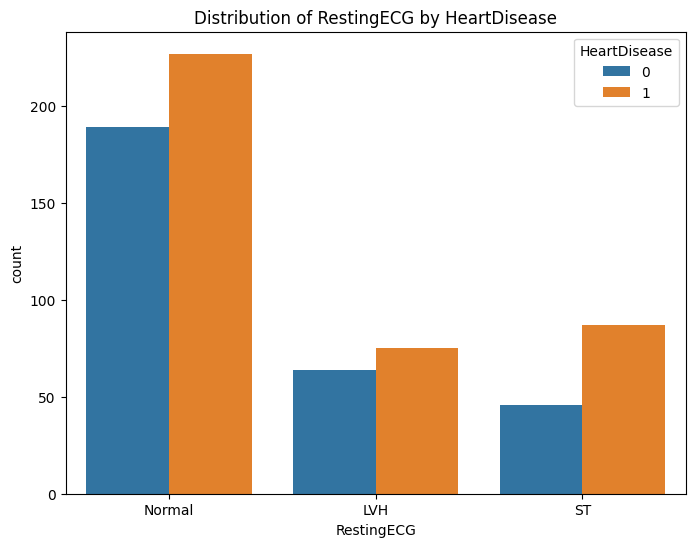

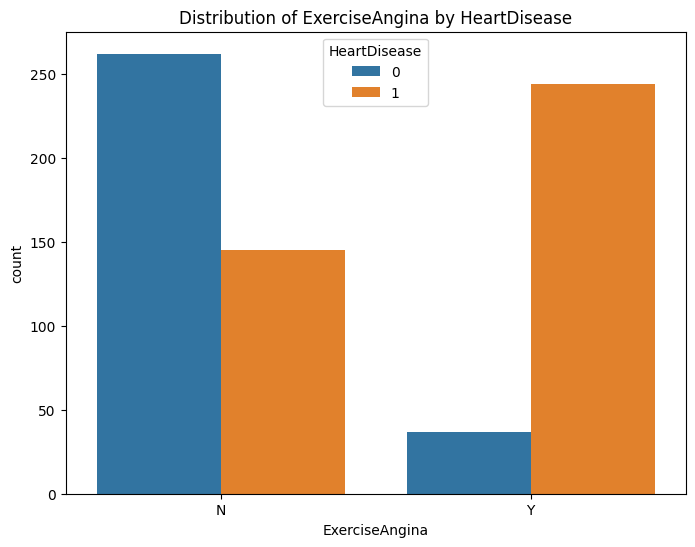

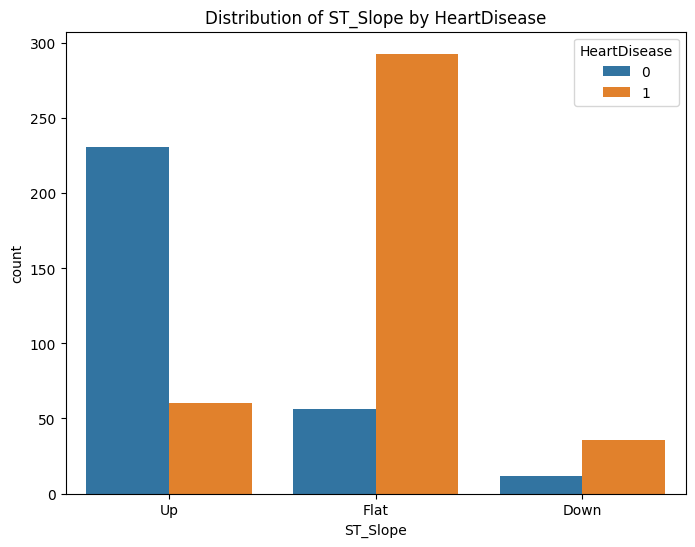

In [353]:
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=dftrain, x=var, hue='HeartDisease')
    plt.title(f'Distribution of {var} by HeartDisease')
    plt.show()

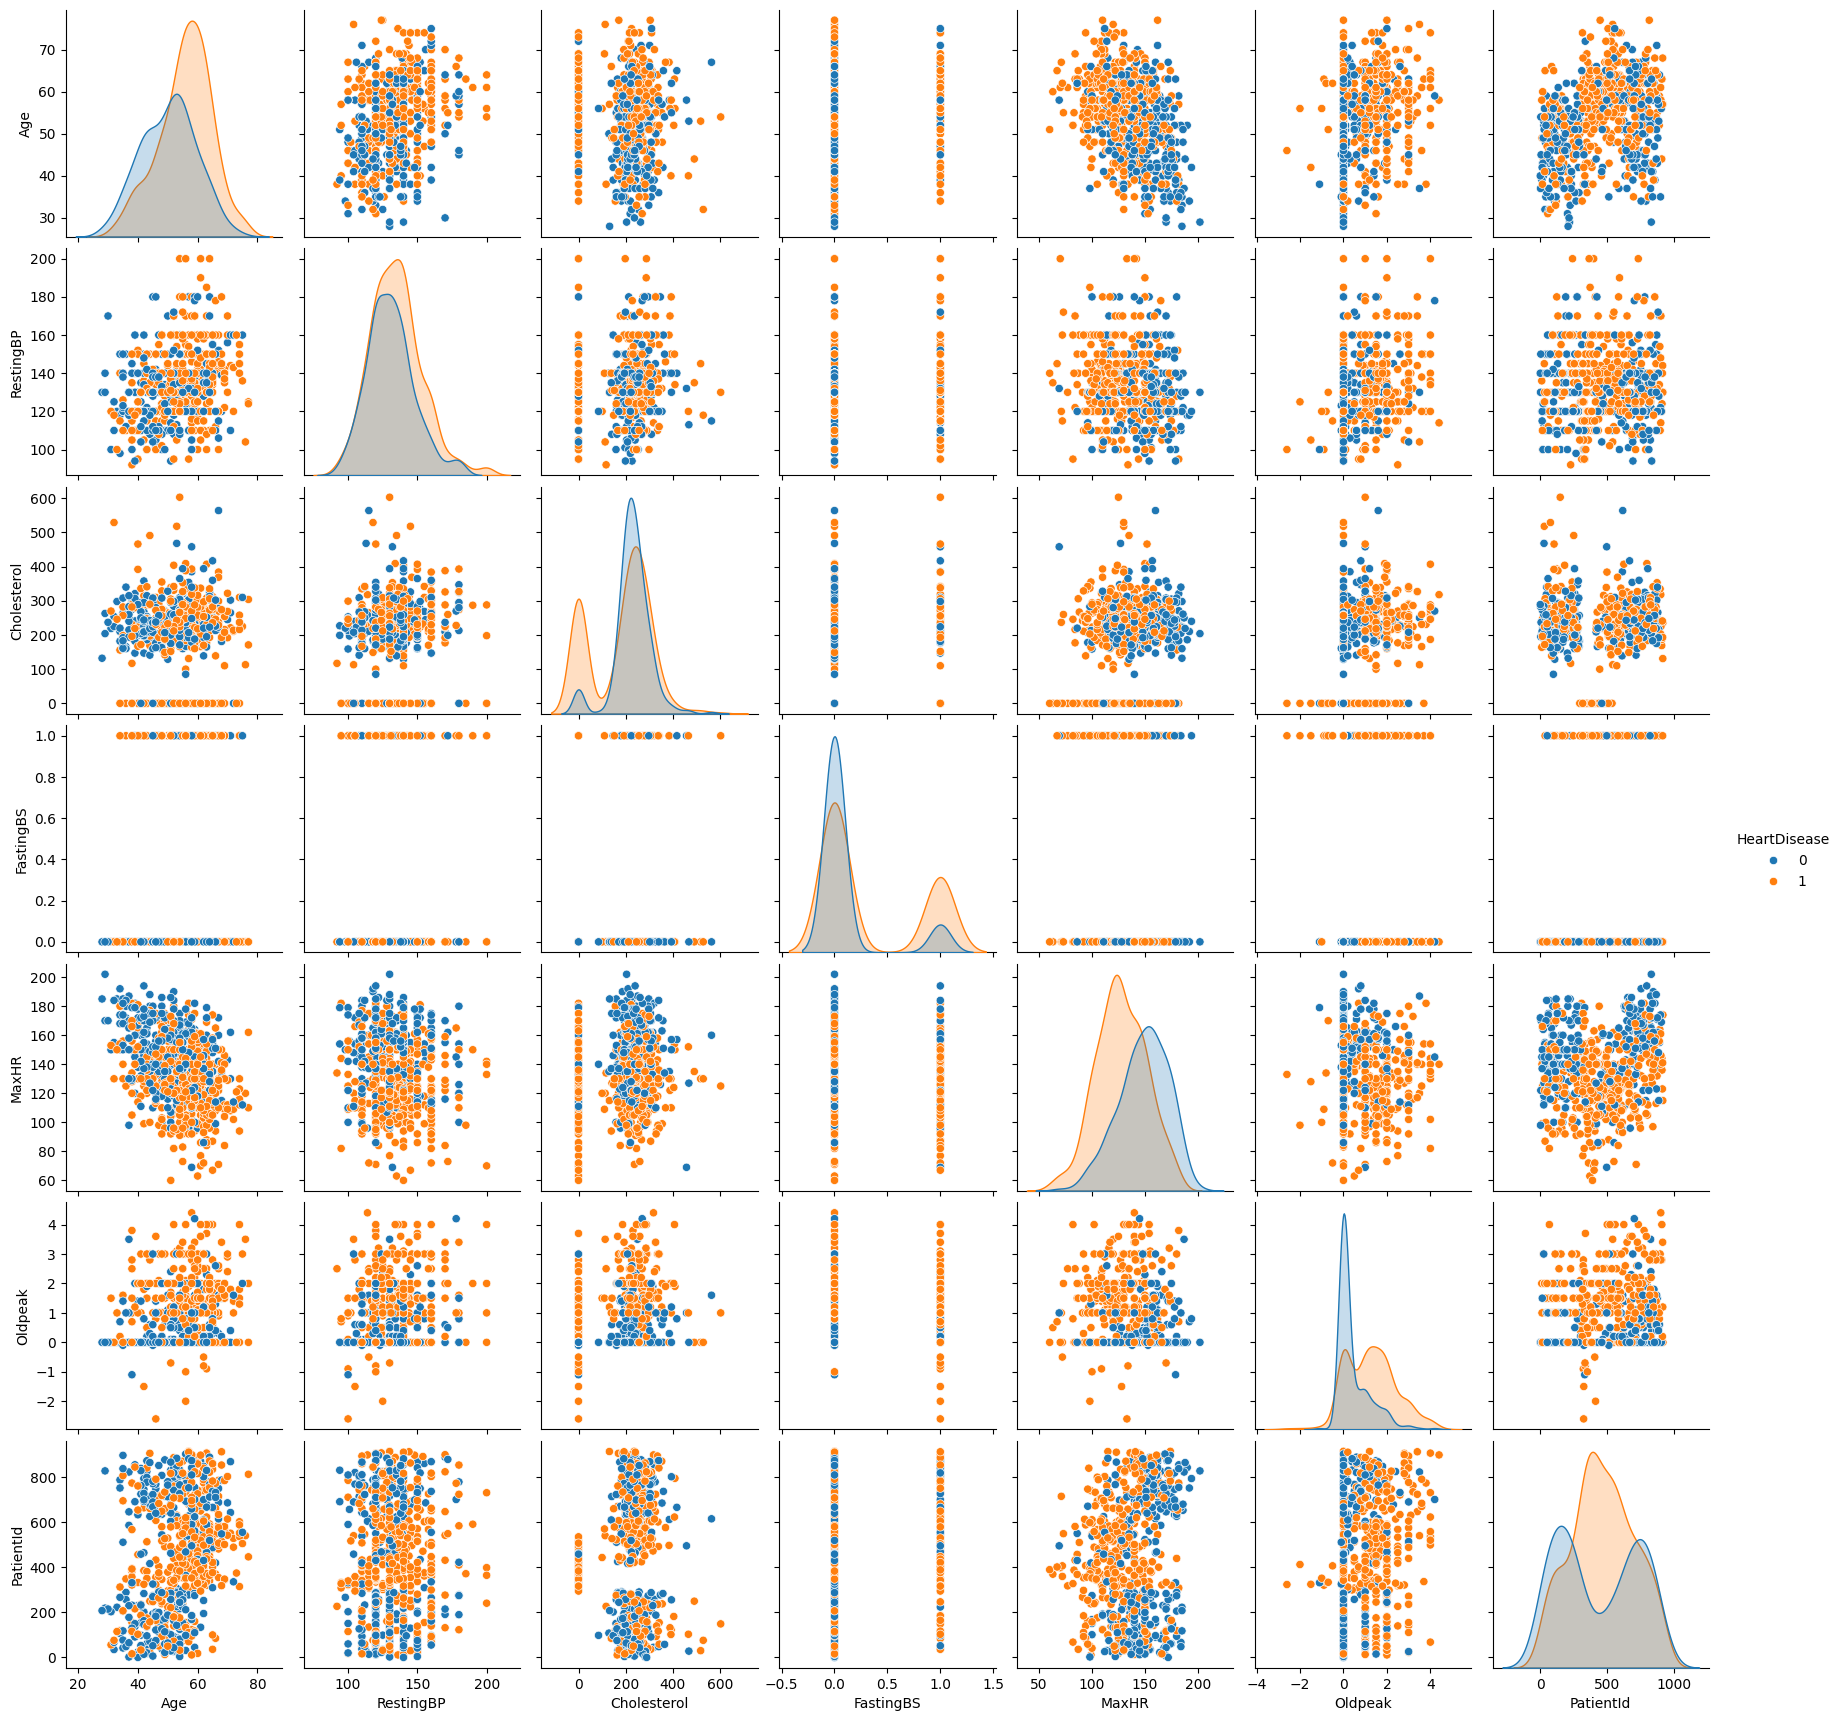

In [354]:
sns.pairplot(dftrain, hue='HeartDisease')
plt.show()

#####Data Preprocessing and Feature Engineering

In [355]:
dftrain.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
PatientId         0
dtype: int64

In [356]:
one_hot_encoded = pd.get_dummies(dftrain[['ChestPainType', 'RestingECG', 'ST_Slope']])

In [357]:
print(one_hot_encoded)

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0                    0                  1                  0   
1                    1                  0                  0   
2                    1                  0                  0   
3                    0                  1                  0   
4                    1                  0                  0   
..                 ...                ...                ...   
683                  1                  0                  0   
684                  1                  0                  0   
685                  1                  0                  0   
686                  1                  0                  0   
687                  1                  0                  0   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2     

In [358]:
dftrain = pd.concat([dftrain, one_hot_encoded], axis=1)
dftrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,M,ATA,131,0,0,Normal,130,N,0.1,...,0,1,0,0,0,1,0,0,0,1
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,...,1,0,0,0,0,1,0,0,0,1
2,50,M,ASY,150,215,0,Normal,140,Y,0.0,...,1,0,0,0,0,1,0,0,0,1
3,61,F,ATA,140,298,1,Normal,120,Y,0.0,...,0,1,0,0,0,1,0,0,0,1
4,53,M,ASY,125,0,1,Normal,120,N,1.5,...,1,0,0,0,0,1,0,0,0,1


In [359]:
dftrain['Sex'] = dftrain['Sex'].replace({'M': 0, 'F': 1})
dftrain['ExerciseAngina'] = dftrain['ExerciseAngina'].replace({'N': 0, 'Y': 1})

In [360]:
dftrain.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,0,ATA,131,0,0,Normal,130,0,0.1,...,0,1,0,0,0,1,0,0,0,1
1,60,0,ASY,135,0,0,Normal,63,1,0.5,...,1,0,0,0,0,1,0,0,0,1
2,50,0,ASY,150,215,0,Normal,140,1,0.0,...,1,0,0,0,0,1,0,0,0,1
3,61,1,ATA,140,298,1,Normal,120,1,0.0,...,0,1,0,0,0,1,0,0,0,1
4,53,0,ASY,125,0,1,Normal,120,0,1.5,...,1,0,0,0,0,1,0,0,0,1


In [361]:
dftrain = dftrain.drop(columns=['ChestPainType', 'RestingECG', 'ST_Slope', 'PatientId'])

In [362]:
dftrain

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,0,131,0,0,130,0,0.1,0,0,1,0,0,0,1,0,0,0,1
1,60,0,135,0,0,63,1,0.5,1,1,0,0,0,0,1,0,0,0,1
2,50,0,150,215,0,140,1,0.0,0,1,0,0,0,0,1,0,0,0,1
3,61,1,140,298,1,120,1,0.0,0,0,1,0,0,0,1,0,0,0,1
4,53,0,125,0,1,120,0,1.5,1,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,51,0,131,152,1,130,1,1.0,1,1,0,0,0,1,0,0,0,1,0
684,52,0,125,212,0,168,0,1.0,1,1,0,0,0,0,1,0,0,0,1
685,41,0,104,0,0,111,0,0.0,0,1,0,0,0,0,0,1,0,0,1
686,56,0,140,0,1,121,1,1.8,1,1,0,0,0,0,1,0,0,0,1


In [363]:
dftrain.size

13072

In [364]:
dftrain = dftrain[(np.abs(stats.zscore(dftrain)) < 3).all(axis=1)]

In [365]:
dftrain.size

11457

In [366]:
#dftrain['Age'] = pd.cut(dftrain['Age'], bins=5, labels=False)

In [367]:
y = dftrain['HeartDisease']

In [368]:
dftrain = dftrain.drop(columns=['HeartDisease'])

In [369]:
dftrain

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,62,0,131,0,0,130,0,0.1,0,1,0,0,0,1,0,0,0,1
1,60,0,135,0,0,63,1,0.5,1,0,0,0,0,1,0,0,0,1
2,50,0,150,215,0,140,1,0.0,1,0,0,0,0,1,0,0,0,1
3,61,1,140,298,1,120,1,0.0,0,1,0,0,0,1,0,0,0,1
4,53,0,125,0,1,120,0,1.5,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,51,0,131,152,1,130,1,1.0,1,0,0,0,1,0,0,0,1,0
684,52,0,125,212,0,168,0,1.0,1,0,0,0,0,1,0,0,0,1
685,41,0,104,0,0,111,0,0.0,1,0,0,0,0,0,1,0,0,1
686,56,0,140,0,1,121,1,1.8,1,0,0,0,0,1,0,0,0,1


In [370]:
y

0      0
1      1
2      0
3      0
4      1
      ..
683    1
684    1
685    0
686    1
687    1
Name: HeartDisease, Length: 603, dtype: int64

In [371]:
X = dftrain.values

In [372]:
X.shape

(603, 18)

In [373]:
y = y.values

In [374]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

#####Train/Test Split

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [376]:
X_train.shape

(482, 18)

In [377]:
X_test.shape

(121, 18)

#####Normalization

In [378]:
sc = StandardScaler()

In [379]:
X_train = sc.fit_transform(X_train)

In [380]:
X_train

array([[ 0.2081155 , -0.53416602, -0.74926715, ...,  0.        ,
        -1.08673616,  1.08673616],
       [ 0.75092757, -0.53416602, -0.74926715, ...,  0.        ,
        -1.08673616,  1.08673616],
       [ 0.96805239, -0.53416602, -1.04340852, ...,  0.        ,
         0.92018655, -0.92018655],
       ...,
       [ 0.53380274, -0.53416602, -1.92583261, ...,  0.        ,
        -1.08673616,  1.08673616],
       [ 2.27080135, -0.53416602,  0.72143967, ...,  0.        ,
        -1.08673616,  1.08673616],
       [-0.66038381, -0.53416602,  1.60386376, ...,  0.        ,
         0.92018655, -0.92018655]])

In [381]:
X_test = sc.transform(X_test)

#####Model Selection

######Logistic Regression

In [382]:
model = LogisticRegression()

In [383]:
model.fit(X_train, y_train)

LogisticRegression()

In [384]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [385]:
accuracy

0.8925619834710744

In [386]:
precision

0.89449423815621

In [387]:
recall

0.8925619834710744

In [388]:
f1

0.8919644832053589

In [389]:
conf_matrix

array([[46,  9],
       [ 4, 62]])

######Decision Tree

In [390]:
model2 = DecisionTreeClassifier()

In [391]:
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [392]:
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [393]:
accuracy

0.7851239669421488

In [394]:
precision

0.7847845827868025

In [395]:
recall

0.7851239669421488

In [396]:
f1

0.7847379265289713

In [397]:
conf_matrix

array([[41, 14],
       [12, 54]])

######Random Forest

In [398]:
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [399]:
model3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [400]:
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [401]:
accuracy

0.8760330578512396

In [402]:
precision

0.8777208706786171

In [403]:
recall

0.8760330578512396

In [404]:
f1

0.8753436344677221

In [405]:
conf_matrix

array([[45, 10],
       [ 5, 61]])

######Support Vector Machine

In [406]:
model4 = SVC(kernel='linear',C=1.0, random_state=42)

In [407]:
model4.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [408]:
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [409]:
accuracy

0.8760330578512396

In [410]:
precision

0.8799294312992942

In [411]:
recall

0.8760330578512396

In [412]:
f1

0.874942058709608

######Neural Networks

In [413]:
model5 = MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000, activation='relu',solver='sgd',random_state=42)

In [414]:
model5.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42,
              solver='sgd')

In [415]:
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [416]:
accuracy

0.9008264462809917

In [417]:
precision

0.9039888682745826

In [418]:
recall

0.9008264462809917

In [419]:
f1

0.9001216175129217

######Gradient Boosting Classifier

In [420]:
classifier = GradientBoostingClassifier()

param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

In [421]:
model6 = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
model6.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [422]:
best_model = model6.best_estimator_

In [423]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [424]:
accuracy

0.8925619834710744

In [425]:
precision

0.89449423815621

In [426]:
recall

0.8925619834710744

In [427]:
f1

0.8919644832053589

######KNN

In [428]:
knn_model = KNeighborsClassifier()

In [429]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [430]:
knn_model.score(X_test, y_test)

0.8842975206611571

######Tensor Flow

In [431]:
modeltf = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [432]:
modeltf.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

In [433]:
modeltf.fit(X_train, y_train, batch_size=10, epochs=40)

Epoch 1/40
49/49 [==============================] - 1s 2ms/step - loss: 0.6887 - binary_accuracy: 0.5290
Epoch 2/40
49/49 [==============================] - 0s 2ms/step - loss: 0.6092 - binary_accuracy: 0.7282
Epoch 3/40
49/49 [==============================] - 0s 2ms/step - loss: 0.5352 - binary_accuracy: 0.8133
Epoch 4/40
49/49 [==============================] - 0s 2ms/step - loss: 0.4651 - binary_accuracy: 0.8527
Epoch 5/40
49/49 [==============================] - 0s 2ms/step - loss: 0.4099 - binary_accuracy: 0.8651
Epoch 6/40
49/49 [==============================] - 0s 2ms/step - loss: 0.3747 - binary_accuracy: 0.8714
Epoch 7/40
49/49 [==============================] - 0s 2ms/step - loss: 0.3534 - binary_accuracy: 0.8734
Epoch 8/40
49/49 [==============================] - 0s 2ms/step - loss: 0.3380 - binary_accuracy: 0.8714
Epoch 9/40
49/49 [==============================] - 0s 2ms/step - loss: 0.3280 - binary_accuracy: 0.8776
Epoch 10/40
49/49 [==============================] - 0s

In [434]:
modeltf.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.2868 - binary_accuracy: 0.9008


[0.2868061661720276, 0.9008264541625977]

#####Predict on Test Data

In [435]:
test_df = pd.read_csv('test.csv')

In [436]:
test_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,PatientId
0,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,688
1,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,297
2,60,F,TA,150,240,0,Normal,171,N,0.9,Up,678
3,51,F,NAP,140,308,0,LVH,142,N,1.5,Up,859
4,61,M,TA,134,234,0,Normal,145,N,2.6,Flat,628


In [437]:
test_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
PatientId         0
dtype: int64

In [438]:
one_hot_encoded = pd.get_dummies(test_df[['ChestPainType', 'RestingECG', 'ST_Slope']])

In [439]:
test_df  = pd.concat([test_df, one_hot_encoded], axis=1)

In [440]:
test_df['Sex'] = test_df['Sex'].replace({'M': 0, 'F': 1})
test_df['ExerciseAngina'] = test_df['ExerciseAngina'].replace({'N': 0, 'Y': 1})

In [441]:
PatientId = test_df['PatientId']

In [442]:
test_df= test_df.drop(columns=['ChestPainType', 'RestingECG', 'ST_Slope', 'PatientId'])

In [443]:
Test_X = test_df.values

In [444]:
Test_X.shape

(230, 18)

In [445]:
Test_X = sc.transform(Test_X)
y_pred_test = model4.predict(Test_X)

In [446]:
y_pred_test


array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

In [447]:
test_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,76,1,140,197,0,116,0,1.1,0,0,1,0,0,0,1,0,1,0
1,57,0,110,0,1,131,1,1.4,1,0,0,0,0,0,1,0,0,1
2,60,1,150,240,0,171,0,0.9,0,0,0,1,0,1,0,0,0,1
3,51,1,140,308,0,142,0,1.5,0,0,1,0,1,0,0,0,0,1
4,61,0,134,234,0,145,0,2.6,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,57,0,152,274,0,88,1,1.2,1,0,0,0,0,1,0,0,1,0
226,70,0,140,0,1,157,1,2.0,1,0,0,0,0,1,0,0,1,0
227,45,1,132,297,0,144,0,0.0,1,0,0,0,0,1,0,0,0,1
228,50,0,115,0,0,120,1,0.5,1,0,0,0,0,1,0,0,1,0


#####Submission

In [448]:
df_submission = pd.DataFrame({'PatientId': PatientId, 'HeartDisease': y_pred_binary})

In [449]:
df_submission

,PatientId,HeartDisease
0,688,0
1,297,1
2,678,0
3,859,0
4,628,1
...,...,...
225,737,1
226,378,1
227,66,0
228,381,1


In [450]:
df_submission.to_csv('submission.csv', index=False)